In [14]:
import cv2
import matplotlib.pyplot as mat
import arabic_reshaper
from bidi.algorithm import get_display
from PIL import Image, ImageFont, ImageDraw
import mysql.connector as sql
import os
import numpy as np
import math


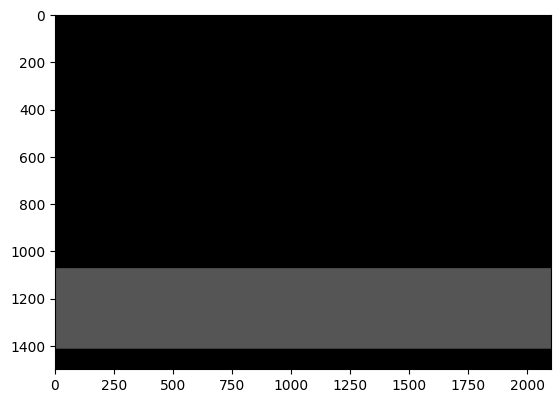

In [3]:

image = cv2.imread('Untitled-1.png')

mat.imshow(image)

cv2.waitKey()

cv2.destroyAllWindows()

<>:105: SyntaxWarning: invalid escape sequence '\q'
<>:179: SyntaxWarning: invalid escape sequence '\q'
<>:105: SyntaxWarning: invalid escape sequence '\q'
<>:179: SyntaxWarning: invalid escape sequence '\q'
C:\Users\aases\AppData\Local\Temp\ipykernel_8852\2788247101.py:105: SyntaxWarning: invalid escape sequence '\q'
  cv2.imwrite('D:\quran_image\%s\%s.jpg' % (aye_data[1],aye_data[2]), numpy_image)
C:\Users\aases\AppData\Local\Temp\ipykernel_8852\2788247101.py:179: SyntaxWarning: invalid escape sequence '\q'
  cv2.imwrite('D:\quran_image\%s\%s_%s.jpg' % (aye_data[1],aye_data[2] , b), numpy_image)


1
713
105
2
693
89
3
466
101
4
454
101
5
721
89
6
700
101
7
1916
109
1
817
105
2
1176
89
3
1835
101
4
number of kalame : 12
5
1475
109
6
1860
109
7
number of kalame : 14
8
1876
102
9
1962
109
10
number of kalame : 13
11
1837
109
12
1201
109
13
number of kalame : 20
14
number of kalame : 16
15
1380
105
16
number of kalame : 11
17
number of kalame : 17
18
922
94
19
number of kalame : 20
20
number of kalame : 28
21
2046
109
22
number of kalame : 24
23
number of kalame : 20
24
number of kalame : 14
25
number of kalame : 39
26
number of kalame : 43
27
number of kalame : 21
28
number of kalame : 14
29
number of kalame : 20
30
number of kalame : 30
31
number of kalame : 15
32
1832
109
33
number of kalame : 24
34
number of kalame : 13
35
number of kalame : 19
36
number of kalame : 21
37
1805
102
38
number of kalame : 18
39
2003
109
40
number of kalame : 14
41
number of kalame : 19
42
1608
109
43
1541
109


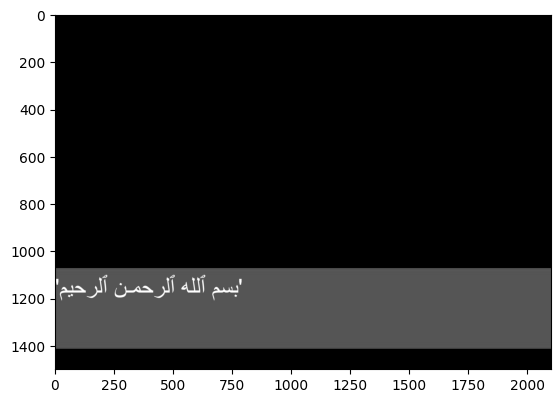

In [15]:
# connect ro mysql 
conector = sql.connect(
user ="root",
passwd ="18127150",
database = "quran"
)

# quran text like (الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ)

cursorObject = conector.cursor()

cursorObject.execute('SELECT * FROM quran_clean limit 50')

myresult = cursorObject.fetchall()
   

# quran text like (الحمد لله رب العالمين)

cursorObject2 = conector.cursor()

cursorObject2.execute('SELECT * FROM quran_clean WHERE sura = 2 and aya = 282')

myresult2 = cursorObject2.fetchall()


# printing on the image 

for aye_data in myresult :

    aye = aye_data[3]

    print(aye_data[2])
    
####
    text_to_be_reshaped = '%r' % (aye)
    reshaped_text = arabic_reshaper.reshape(text_to_be_reshaped) # seperated chars problem
    bidi_text = get_display(reshaped_text) #direction problem


    text = bidi_text.encode().decode('utf-8') #encoding problem (rectangular boxes!)

    pil_image = Image.fromarray(image)
    font = ImageFont.truetype("arial", 100, encoding='unic')
    draw = ImageDraw.Draw(pil_image)
        
###
        
        
    
    bbox = draw.textbbox((0, 0), text, font=font)
    text_width = bbox[2] - bbox[0]
    image_width, image_height = pil_image.size

    


    if text_width <= image_width :
        
        #برای حذف "" در هنگام چاپ ایات 
        spiliter = aye.split()
        slide = " ".join(spiliter)
        #


        text_to_be_reshaped = slide
        reshaped_text = arabic_reshaper.reshape(text_to_be_reshaped) # seperated chars problem
        bidi_text = get_display(reshaped_text) #direction problem


        text = bidi_text.encode().decode('utf-8') #encoding problem (rectangular boxes!)

        pil_image = Image.fromarray(image)
        font = ImageFont.truetype("arial", 100, encoding='unic')
        draw = ImageDraw.Draw(pil_image)
        
       #srtart_point = (int((1900*number_letter)/53)) + 100

        

       #draw.text((srtart_point,1100), text, (255,255,255), font=font,)
        

        draw = ImageDraw.Draw(pil_image)
        bbox = draw.textbbox((0, 0), text, font=font)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]

        print(text_width)
        print(text_height)

        #text_width, text_height = draw.textsize(text, font=font)

        image_width, image_height = pil_image.size
        x_center = (image_width - text_width) / 2
        y_center = 1175

# رسم متن در وسط تصویر
        draw.text((x_center, y_center), text, (255, 255, 255), font=font)



        numpy_image = np.array(pil_image)

            
        cv2.imwrite('D:\quran_image\%s\%s.jpg' % (aye_data[1],aye_data[2]), numpy_image)





    else : 
        
        bbox = draw.textbbox((0, 0), text, font=font)
        text_width = bbox[2] - bbox[0]
        image_width, image_height = pil_image.size
        
        
        # aye_slide = text_width / image_width
        # image_width
        spiliter = aye.split()

        number_kalamat = 0

        for i in spiliter :
            number_kalamat += 1
        
        print("number of kalame : %r" % number_kalamat)

        #aye_slide = number_kalamat / 29

        aye_slide = 5

        slide_number = number_kalamat / aye_slide
        slide_number = math.ceil(slide_number)
        

        for b in range(0,slide_number):
            #در 2 خط زیر ایات به صورت کلمه کلمه در یک لیست ذخیره میشوند و در خط اخر تنها تعدادی که میخواهیم در کنار هم قرار میگیرند مثلا کلمات 1 تا 5
            #print(b)
            spiliter = aye.split()
            slide = " ".join(spiliter[int(b*aye_slide): int((b+1)*aye_slide)])
            #print(slide)





            #text_to_be_reshaped = '%r' % (slide)
            text_to_be_reshaped = slide
            reshaped_text = arabic_reshaper.reshape(text_to_be_reshaped) # seperated chars problem
            bidi_text = get_display(reshaped_text) #direction problem


            text = bidi_text.encode().decode('utf-8') #encoding problem (rectangular boxes!)

            pil_image_slide = Image.fromarray(image)
            font = ImageFont.truetype("arial", 100, encoding='unic')
            draw = ImageDraw.Draw(pil_image_slide)


            # size of new text
            bbox = draw.textbbox((0, 0), text, font=font)
            text_width = bbox[2] - bbox[0]  
            #

            image_width, image_height = pil_image.size
            x_center = (image_width - text_width) / 2
            y_center = 1175

# رسم متن در وسط تصویر
            draw.text((x_center, y_center), text, (255, 255, 255), font=font)
            

            
            
            numpy_image = np.array(pil_image_slide)

            
            cv2.imwrite('D:\quran_image\%s\%s_%s.jpg' % (aye_data[1],aye_data[2] , b), numpy_image)








test = cv2.imread('1.jpg')

mat.imshow(test)

cv2.waitKey()

cv2.destroyAllWindows()





# Disconnecting from the server
conector.close()


In [55]:
aye_slide = text_width / image_width
for b in range(1,int(aye_slide)+1):
#در 2 خط زیر ایات به صورت کلمه کلمه در یک لیست ذخیره میشوند و در خط اخر تنها تعدادی که میخواهیم در کنار هم قرار میگیرند مثلا کلمات 1 تا 5
    spiliter = aye.split()
    slide = " ".join(spiliter[(b*aye_slide):((b+1)*aye_slide)])
    print(slide)

In [58]:
txt = 'كان الذي عليه الحق سفيها أو ضعيفا أو لا يستطيع أن يمل هو فليملل وليه بالعدل ۚ واستشهدوا شهيدين من'

spiliter = txt.split()


number = 0

for i in spiliter :
    number += 1

print(number) 


20
